<a href="https://colab.research.google.com/github/rachit-shah/automated-learning-and-data-analysis/blob/master/hw2q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. In this problem, you will perform a PCA on the pro- vided training dataset (“hw2q1 train.csv”) and the testing dataset (“hw2q1 test.csv”), which come from the Connectionist Bench Dataset (http://archive.ics.uci.edu/ ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)). In both datasets, each row represents a data point or sample. The first 60 columns are input features, and the last column ”Class” is the output label, with the letters ”R” and ”M” indicating if a sample is a Rock or a Mine, respectively.


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## (a) Load the data. Report the size of the training and testing sets. How many Rock (R) and Mine (M) samples are in the training set and the testing set, respectively?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [0]:
training_data=pd.read_csv("hw2q1_train.csv")

IOError: ignored

In [0]:
testing_data=pd.read_csv("hw2q1_test.csv")

In [0]:
training_data.shape[0]      # Training Data Size


156

In [0]:
testing_data.shape[0]       # Testing Data Size

52

In [0]:
print sum(training_data["Class"]=="R")           # Training Data Number of R
print sum(training_data["Class"]=="M")           # Training Data Number of M

73
83


In [0]:
print sum(testing_data["Class"]=="R")            # Testing Data Number of R

24


In [0]:
print sum(testing_data["Class"]=="M")            # Testing Data Number of M

28


## (b) (18 points) Preprocessing Data-Normalization: Please run normalization on all input features in both the training and testing datasets to obtain the normalized training and the normalized testing datasets. (Hint: you will need to use the min/max of the training dataset to normalize the testing dataset and do NOT normalize the output ”Class” of data.)

## Use the NEW normalized datasets for the following tasks :
i. (2 points) Calculate the covariance matrix of the NEW training dataset.

In [0]:
scaler = preprocessing.MinMaxScaler()    #Function to do normalization in columns
td=training_data.iloc[:,:-1]             # Removing Last column of Training Set for doing normalization
np_scaled = scaler.fit_transform(td)
dftrain = pd.DataFrame(np_scaled)

In [0]:
ted=testing_data.iloc[:,:-1]             #Removing last column to do normalization
np_scaled = scaler.fit_transform(ted)    # Function For doing Normalization
dftest = pd.DataFrame(np_scaled)

In [0]:
dftrain_cov = dftrain.cov()              #Covariance Vector of Training Dataset
#dftrain=dftrain.values             #Converting datframe to array
dftrain_cov.size

3600

In [0]:
eigen_values, eigen_vectors = linalg.eig(np.array(dftrain_cov))   # Function to calculate Eigen Values and Eigen Vector

In [0]:
len(dftrain)      # Size of covariance matrix

156

In [0]:
eigen_values=pd.Series(eigen_values)
eigen_values.nlargest(5)         #Top 5 Eigen Values

0    0.694774
1    0.457195
2    0.223260
3    0.191342
4    0.117890
dtype: float64

In [0]:
eigen_vectors.size

3600

In [0]:
for ev in eigen_vectors:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [0]:

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]  # Forming a pair of eigen value and a vector
eigen_pairs.sort()             # Sorting the pair
eigen_pairs.reverse()          # Reversing the sorted list

print('Eigenvalues in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues in descending order:
0.6947742509576804
0.4571950707171714
0.22325970757013516
0.19134230558123752
0.1178900770971306
0.10496217705674722
0.09194282333191875
0.0793753902885795
0.06908271488898671
0.05938629083624857
0.04747946236074494
0.041848191099335914
0.037243378986197624
0.03676183836651685
0.03023091674033084
0.028559074950319854
0.02719504415995599
0.024362837409466827
0.023474792929684973
0.021681741643057664
0.020977789529714488
0.018005162648213252
0.017098518641477958
0.016863003528107448
0.01614524504837085
0.015029901398389963
0.013521959225852729
0.012539085860492034
0.011330063037218036
0.009865652380984094
0.009251920822793445
0.008269543043932955
0.007507338763209107
0.00735183206854135
0.006274118567857992
0.005551641264496947
0.004985322843612494
0.004644315134608252
0.004197183585463372
0.003883649939615111
0.0036278476607175744
0.0032243359510736435
0.002678238522902143
0.002556015648294251
0.0023798560855996576
0.001940066585055722
0.0018083253727813

In [0]:
total = sum(eigen_values)
var_exp = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

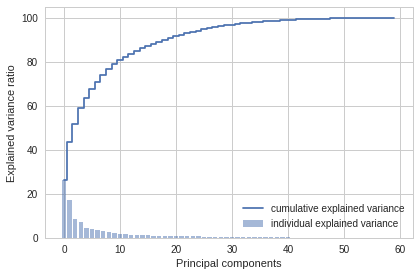

In [0]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(60), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(60), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**The total principal components that should be taken here should be 10. As in the graph the elbow is best suited with point 10. This is because after that the curve becomes almost straight.**

TypeError: ignored

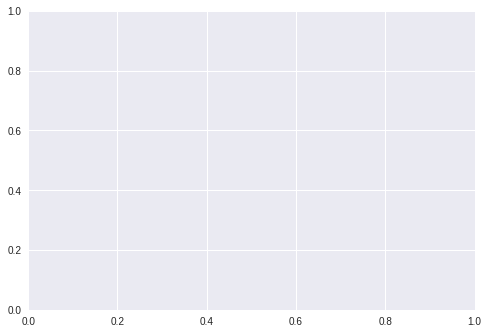

In [0]:
pca=PCA(n_components=10)

In [0]:
pca.fit(dftrain)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.components_


array([[ 2.33168965e-02,  2.05015097e-02,  2.55759984e-02,
         2.83576327e-02,  5.41297517e-02,  4.70267910e-02,
         4.67131835e-02,  2.76682826e-02,  2.56599263e-02,
         3.23363726e-02,  6.91223893e-02,  8.57410586e-02,
         1.24649616e-01,  1.43295766e-01,  1.80090595e-01,
         2.20534050e-01,  2.74660102e-01,  2.87894730e-01,
         2.89914572e-01,  2.74814383e-01,  2.48529787e-01,
         2.34373300e-01,  1.58444570e-01,  8.11158959e-02,
         3.71981289e-02, -4.01529425e-03, -5.00676107e-02,
        -1.33977389e-01, -1.71963208e-01, -1.90321200e-01,
        -1.88761601e-01, -1.81541036e-01, -1.66567121e-01,
        -1.67282356e-01, -1.58764524e-01, -1.56543803e-01,
        -1.28676396e-01, -9.65914363e-02, -8.70799263e-02,
        -9.41730452e-02, -1.13386490e-01, -1.19489039e-01,
        -1.09209152e-01, -9.08921138e-02, -1.02861370e-01,
        -9.13172211e-02, -7.74679387e-02, -8.75312524e-02,
        -6.75200694e-02, -4.34833810e-02, -1.91843125e-0

In [0]:
type(pca.components_)

numpy.ndarray